## Introduction

Group stocks based on the correlation of their returns and see how that compares to standard industry groupings

In [1]:
import pandas as pd
import seaborn as sns
import requests 

## Get Data

Stock price data was gotten from the Alpha Vantage API. Using a script I wrote called *get_sp_returns.py*

In [155]:
df = pd.read_csv('sp500_returns.csv').drop(columns=['NEE_Utilities_y', 'VRSK_Industrials_y'])

In [156]:
df.rename(columns={'NEE_Utilities_x': 'NEE_Utilities', 'VRSK_Industrials_x':'VRSK_Industrials'}, inplace=True)

In [157]:
df['Date'] = pd.to_datetime(df['Date'])

Brought in all data for 2019, for 50 stocks on the S&P 500. This primarily due to the limitations on the Alpha Vantage API were you can only have 5 requests per minute and 500 a day

In [158]:
print(f'Year:{df.Date.min().year}, Number of Stocks:{df.shape[1] -1}')

Year:2019, Number of Stocks:48


## Correlation Matrix

In [159]:
corrMatrix = df.drop(columns=['Date', 'ESRX_Health Care']).corr()

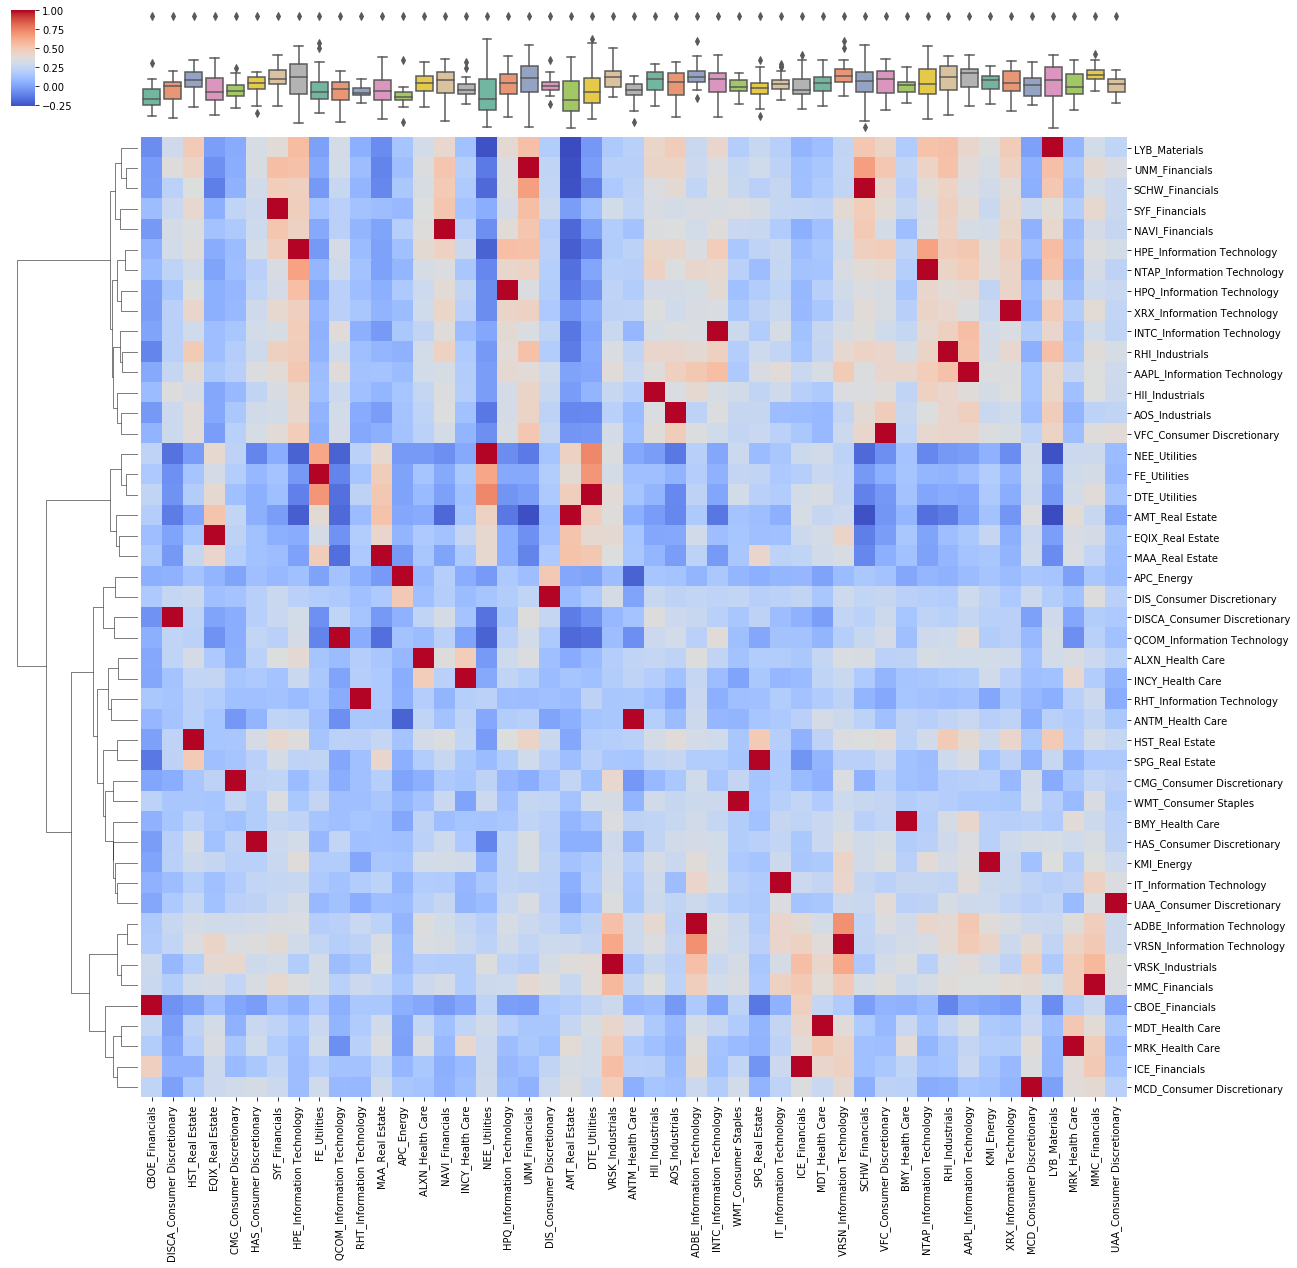

In [160]:
p = sns.clustermap(corrMatrix, annot=False, col_cluster=False, cmap='coolwarm', figsize=(20,20), method='ward')
sns.boxplot(data=corrMatrix, ax=p.ax_col_dendrogram.axes, palette='Set2')